In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_merged_df = pd.merge(ride_data, city_data, how='inner', on='city')

# Display the data table for preview
city_merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

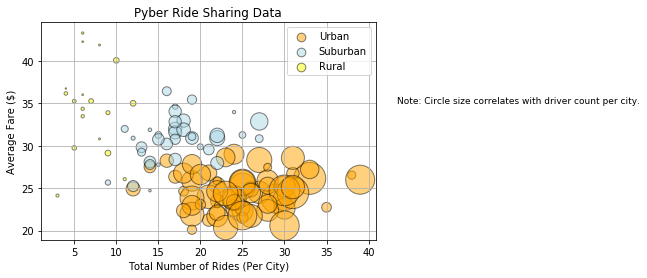

In [27]:
#Get dataframe with average fare, total number of rides, total number of drivers
grouped_city_type = city_merged_df.groupby(['city','type'])
avg_fare = grouped_city_type.mean()
total_num_rides = grouped_city_type.count()
total_num_drivers = grouped_city_type.sum()
city_data_df = pd.DataFrame({ 
                        'Avg Fare':avg_fare['fare'],
                        'Total Rides' : total_num_rides['ride_id'],
                        'Total Drivers' : total_num_drivers['driver_count']
                            })
city_data_df = city_data_df.reset_index()

# Obtain the x and y coordinates for each of the three city types
urban_df = city_data_df.loc[city_data_df['type']=='Urban']
sub_df = city_data_df.loc[city_data_df['type']=='Suburban']
rural_df = city_data_df.loc[city_data_df['type']=='Rural']

urban_x_coord = urban_df['Total Rides']
urban_y_coord = urban_df['Avg Fare']
sub_x_coord = sub_df['Total Rides']
sub_y_coord = sub_df['Avg Fare']
rural_x_coords = rural_df['Total Rides']
rural_y_coords = rural_df['Avg Fare']

# Build the scatter plots for each city types
scale_bubbles = 45
urban_bubble = urban_df['Total Drivers']*(scale_bubbles/100)
urban_handle = plt.scatter(urban_x_coord, urban_y_coord, marker="o", facecolors="orange", edgecolors="black", label='Urban', s=(urban_bubble),alpha=0.5)
sub_bubble = sub_df['Total Drivers']*(scale_bubbles/100)
sub_handle = plt.scatter(sub_x_coord, sub_y_coord, marker="o", facecolors="lightblue", edgecolors="black",label='Suburban' , s=(sub_bubble),alpha=0.5)
rural_bubble = rural_df['Total Drivers']*(scale_bubbles/100)
rural_handle = plt.scatter(rural_x_coords, rural_y_coords, marker="o", facecolors="yellow", edgecolors="black", label='Rural', s=(rural_bubble),alpha=0.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(handles = [urban_handle, sub_handle, rural_handle], scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.figtext(.95, .6, "Note: Circle size correlates with driver count per city.", fontsize=9)

# Save Figure
plt.savefig("Ride_Sharing_Data.png", bbox_inches = 'tight')

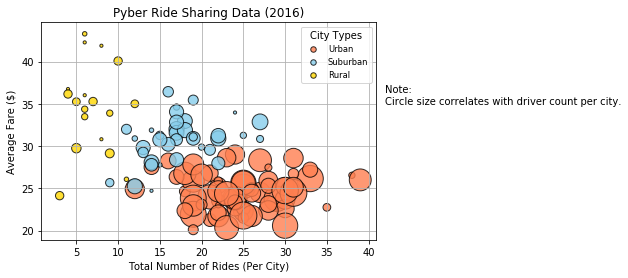

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

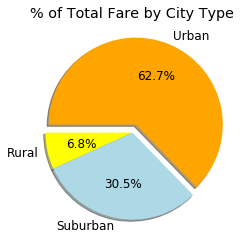

In [63]:
# Calculate Type Percents
city_type = city_merged_df.groupby(['type'])
fares_percent = (city_type['fare'].sum())/(city_merged_df['fare'].sum())*100
city_type_df = pd.DataFrame({'% Fares by City Type' : fares_percent,})
city_type_df['% Fares by City Type'] = city_type_df['% Fares by City Type'].map("{:.2f}%".format)

# Build Pie Chart
labels = fares_percent.index.tolist()
colors = ["yellow", "lightblue", "orange"]
explode = (0, 0, 0.10)
plt.pie(fares_percent, labels = labels, explode = explode, colors = colors, startangle = 180, shadow = True, autopct="%1.1f%%")
plt.rcParams['font.size'] = 12.0
plt.title("% of Total Fare by City Type")

# Save Figure
plt.savefig("Total_Fares.png", bbox_inches = 'tight', shadow=True)

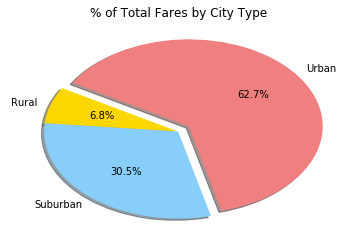

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

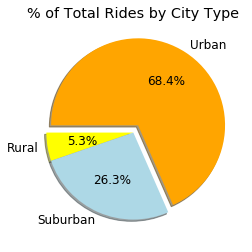

In [64]:
# Calculate Ride Percents
city_type = city_merged_df.groupby(['type'])
rides_percent = (city_type['ride_id'].count())/(city_merged_df['ride_id'].count())*100
ride_type_df = pd.DataFrame({'% Rides by City Type' : rides_percent})
ride_type_df['% Rides by City Type'] = ride_type_df['% Rides by City Type'].map("{:.2f}%".format)

# Build Pie Chart
labels = rides_percent.index.tolist()
colors = ["yellow", "lightblue", "orange"]
explode = (0, 0, 0.10)
plt.pie(rides_percent, labels = labels, explode = explode, colors = colors, startangle = 180, shadow = True, autopct="%1.1f%%")
plt.rcParams['font.size'] = 12.0
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total_Rides.png", bbox_inches = 'tight', shadow=True)


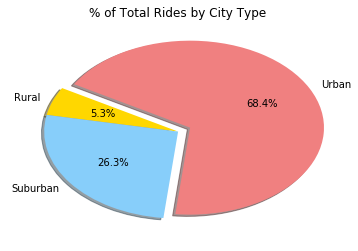

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

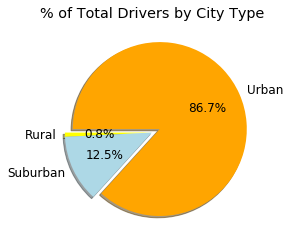

In [65]:
# Calculate Driver Percents
city_type = city_merged_df.groupby(['type'])
drivers_percent = (city_type['driver_count'].sum())/(city_merged_df['driver_count'].sum())*100
driver_df = pd.DataFrame({'% Drivers by City Type' : drivers_percent})
driver_df['% Drivers by City Type'] = driver_df['% Drivers by City Type'].map("{:.2f}%".format)

# Build Pie Chart
labels = drivers_percent.index.tolist()
colors = ["yellow", "lightblue", "orange"]
explode = (0, 0, 0.10)
plt.pie(drivers_percent, labels = labels, explode = explode, colors = colors, startangle = 180, shadow = True, autopct="%1.1f%%")
plt.rcParams['font.size'] = 12.0
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total_Rides.png", bbox_inches = 'tight', shadow=True)

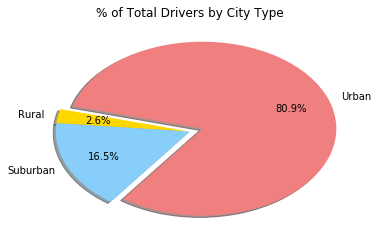

In [6]:
# Show Figure
plt.show()